<center><img src="https://gitlab.com/accredian/insaid-data/-/raw/main/Logo-Accredian/Case-Study-Cropped.png" width= 30% /></center>

# **<center>Ensemble Learning Assignment Solution</center>**

---
# **Table of Contents**
---

**1.** [**Problem Statement**](#Section1)<br>
**2.** [**Objective**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)<br>

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Pre-Profiling Report**](#Section51)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Post Data Processing & Feature Selection**](#Section7)<br>
**8.** [**Model Development & Evaluation**](#Section8)<br>
**9.** [**Conclusion**](#Section9)<br>


---
<a name = Section1></a>
# **1. Problem Statement**
---
- The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in **Taxonomic Problems**, and can also be found on the UCI Machine Learning Repository.
**bold text**
- It includes **three iris species** with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

- They have hired a **team of data scientists**. Consider you are one of them...


---
<a name = Section2></a>
# **2. Objective**
---

- The central goal is to design a model that makes proper classifications for new flowers.

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [ ]:
!pip install -q datascience                                                       # Package that is required by pandas profiling
!pip install -q pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 46.2 MB/s eta 0:00:00


<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync.

- Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.



In [ ]:
!pip install -q --upgrade pandas-profiling

<a name = Section33></a>
### **3.3 Importing Libraries**

In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                               # Importing for panel data analysis
from pandas_profiling import ProfileReport                                        # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                                        # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                                       # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                                           # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                                    # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                                # Importing package numpys (For Numerical Python)
import string                                                                     # For string related operations
import pprint                                                                     # For printing of Collections line by line
from collections import Counter                                                   # For estimating frequency
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                                   # Importing pyplot interface using matplotlib
import seaborn as sns                                                             # Importing seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import precision_recall_curve,accuracy_score                 # For precision and recall metric estimation
from sklearn.metrics import classification_report                                 # To generate complete report of evaluation metrics
from sklearn.metrics import ConfusionMatrixDisplay,roc_auc_score                   # To plot confusion matrix

#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                              # To split the data in training and testing part
from sklearn.preprocessing import StandardScaler                                  # Importing Standard Scaler library from preprocessing.
from sklearn.ensemble import RandomForestClassifier, VotingClassifier             # Loading differernt ensemble models
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier                 # Loading differernt ensemble models
from sklearn.tree import DecisionTreeClassifier                                   # Loading decision tree classifier from tree
from sklearn.svm import SVC                                                       # Loading SVM from  Sklearn
from sklearn.linear_model import LogisticRegression                               # Loading Logistic regression from linear model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score                               # Importing cross validation score from model selection
from sklearn import model_selection
import six
import sys
sys.modules['sklearn.externals.six'] = six
from mlxtend.classifier import StackingClassifier
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                                   # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")

<ipython-input-3-f4c19e71e1c9>:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport                                        # Import Pandas Profiling (To generate Univariate Analysis)


---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---
- The dataset has been provided by Medilet, a research institute and it can be retrieved from the attached <a href = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data">**link**</a>.

</br>

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 	150 | 6 | 	5 KB|

</br>

|Id|Feature|Description|
|:--|:--|:--|
|01|**Id**| Unique code for each sample.|
|02|**SepalLengthCm**|Length of the sepal (in cm).|
|03|**SepalWidthCm**|Width of the sepal (in cm).|
|04|**PetalLengthCm**| Length of the petal (in cm).|
|05|**PetalWidthCm**|Width of the petal (in cm).|
|06|**Species**| Species name.|

In [ ]:
data = pd.read_csv(filepath_or_buffer='https://gitlab.com/accredian/insaid-data/-/raw/main/Terms%202023/Term%206%20ML3/Iris_1_.csv')
print('Data Shape:', data.shape)
data.head()

Data Shape: (150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **description** and **statistics** about the data.

In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**Observations**

- **Average** sepal length is equal to **5.8 cm**.

- **50%** of the flowers have **Sepal Width** less than equal to **3**.

- Similarly, we can understand  the statistical inference for other features.

<a name = Section42></a>
### **4.2 Data Information**

 - In this section, we will get **information about the data** and see some observations.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**Observation**
- We can see that there is **1 features** with **object** datatype and **5 features** as **int or float** datatype.

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Pre Profiling Report**

In [ ]:
# profile = ProfileReport(df=data)
# profile.to_file(output_file='Pre Profiling Report.html')
# print('Accomplished!')

In [ ]:
# from google.colab import files                   # Use only if you are using Google Colab, otherwise remove it
# files.download('Pre Profiling Report.html')      # Use only if you are using Google Colab, otherwise remove it

**Observation:**

-  The report shows that there are **6 features** out of which **1 is categorical**, and **5 is numerical**.

- There exist **0 missing values**.

- PetalLengthCm is **highly correlated** with PetalWidthCm.

- Similarly, we can explore information for the rest of the features from the report.

---
**<h4>Question 1:** Create a function that drops **ID** feature  from the dataset.</h4>

---

In [ ]:
def drop_features():
  data.drop(columns=['Id'], inplace=True)

In [ ]:
drop_features()
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

---
**<h4>Question 2:** Create a function that displays the distribution of all the columns with respect to species column?</h4>

---
<details>

**<summary>Hint:</summary>**

- You can plot the frequency distribution using seaborn hist/kde function.

- You can add hue as species .

In [ ]:
def distribution_plot():
  colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'red']
  figure = plt.figure(figsize = [15, 7])


  plt.subplot(2, 2, 1)
  sns.histplot(x='SepalLengthCm',hue='Species', data=data, color='#DB5F57')
  plt.xlabel('SepalLengthCm', size = 14)
  plt.ylabel('length', size = 14)
  plt.title('Distribution of Sepal Length', size = 16)


  plt.subplot(2, 2, 2)
  sns.histplot(x='SepalWidthCm', hue='Species', data=data, color='lightskyblue')
  plt.xlabel('Sepal Width', size = 14)
  plt.ylabel('length', size = 14)
  plt.title('Distribution of Sepal width', size = 16)


  plt.subplot(2, 2, 3)
  sns.histplot(x='PetalLengthCm', hue='Species', data=data, color='#DBC257')
  plt.xlabel('Petal Length', size = 14)
  plt.ylabel('length', size = 14)
  plt.title('Distribution of petal Length', size = 16)


  plt.subplot(2, 2, 4)
  sns.histplot(x='PetalWidthCm', hue='Species', data=data, color='lightgreen')
  plt.xlabel('PetalWidthCm', size = 14)
  plt.ylabel('length', size = 14)
  plt.title('Distribution of width Length', size = 16)
  plt.tight_layout()
  plt.show()

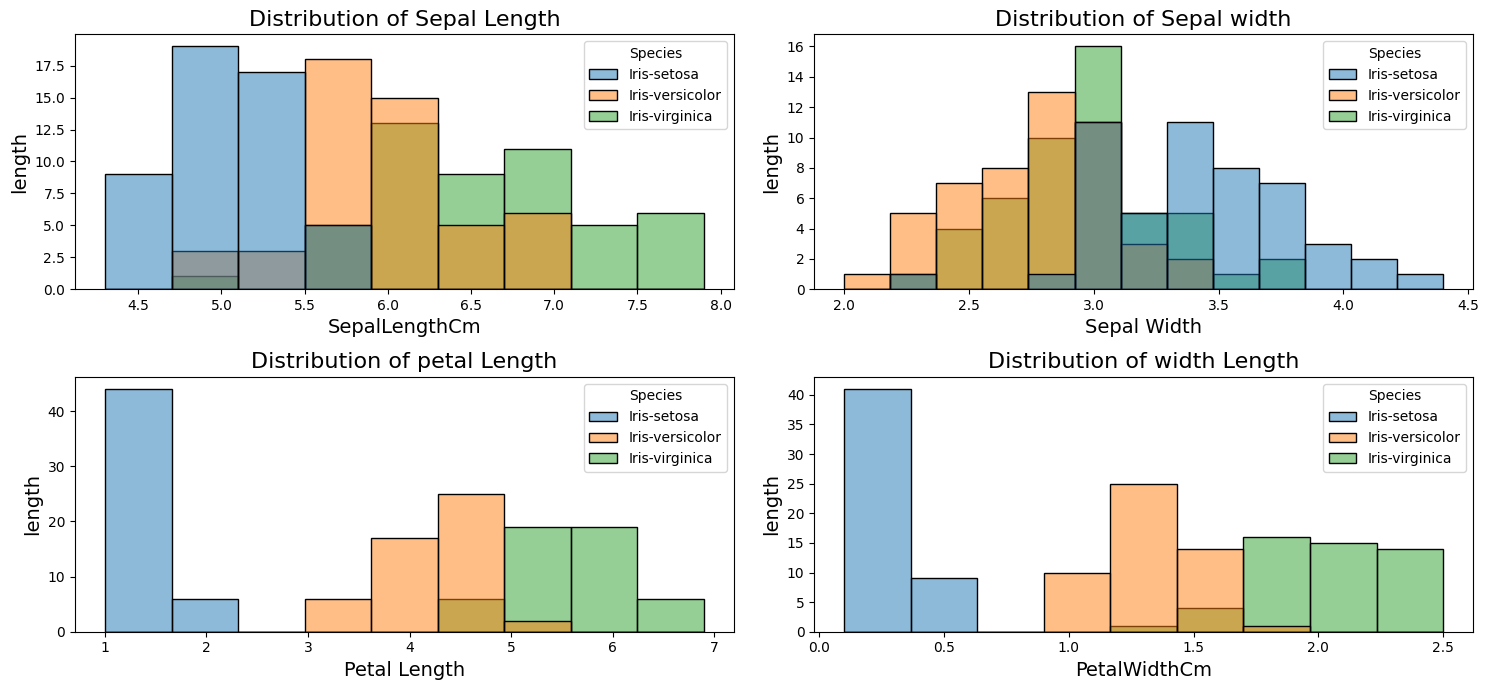

In [ ]:
distribution_plot()

**Observation:**

---
**<h4>Question 3:** Create a function that displays the correlation between different features.</h4>

---
<details>

**<summary>Hint:</summary>**

- Write a function  plot_corr() function to create a heatmap of size (10, 7).

- Use .corr() function to find the correlation between the features in the data.

- Use seaborn heatmap function to plot the following.

In [ ]:
def plot_corr():
  correlation_matrix = data.corr()
  fig = plt.figure(figsize=(10, 7))
  sns.heatmap(correlation_matrix, cmap="coolwarm")
  plt.show()

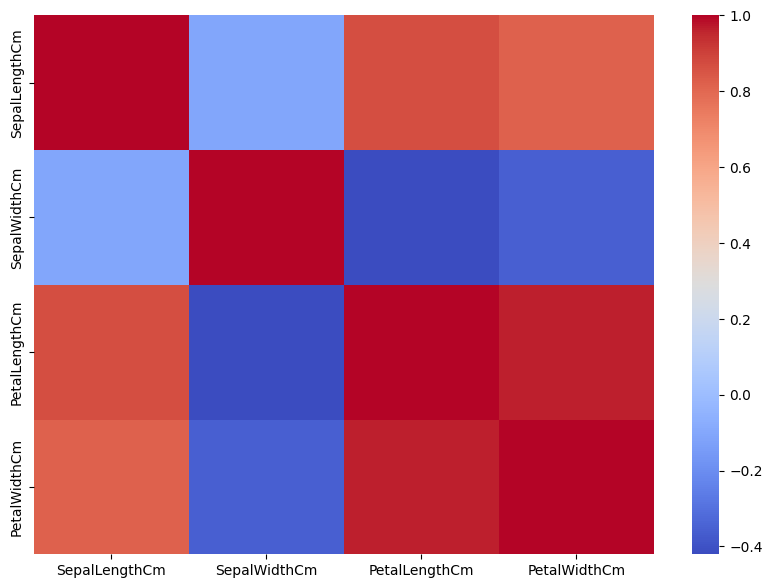

In [ ]:
plot_corr()

**Observation:**

<a name = Section7></a>

---
# **7. Post Data Processing & Feature Selection**
---


---
**<h4>Question 4:** Convert categorical features into numerical features for Modelling.</h4>

---
<details>

**<summary>Hint:</summary>**
- Use **Label encoding** to transform data.

In [ ]:
def Encoding():
  from sklearn.preprocessing import LabelEncoder
  y=data['Species']
  le=LabelEncoder()

  return le.fit_transform(y)

In [ ]:
y1 = Encoding()

---
**<h4>Question 5:** Prepare the  data according to the following model requirements.</h4>

---
<details>

**<summary>Hint:</summary>**
- **Split** the data into **70:30** inside train_test_split.

- Make sure to set the **random_state = 1**.


In [ ]:
def data_prep(data):
  X=data.drop(columns=['Species'])
  y=y1

  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size=0.3)
  return X_train,X_test,y_train, y_test, X, y

In [ ]:
X_train, X_test, y_train, y_test, X, y = data_prep(data)

---
**<h4>Question 6:** Create a function to normalize the data.</h4>

---
<details>

**<summary>Hint:</summary>**
- Using the StandardScaler() function  transform the data in suitable format for the model.


In [ ]:
def scale_data(X_train,X_test):
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    return X_train,X_test

In [ ]:
X_train, X_test = scale_data(X_train,X_test)

<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section, we will develop different **ensemble methods**.

- Then we will **analyze the results** obtained and **make our observation**.

- For **evaluation purposes** we will **focus** on the **accuracy score**.

- **Remember** that we want to **generalize results** i.e. same results or error on testing data as that of training data.

---
**<h4>Question 7:** Create a function to  instantiate a bagging classifier  with the following settings.</h4>

---
<details>

**<summary>Hint:</summary>**

- You have to use the hyperparameters setting of the model as following:
  - `base_estimator` = Logistic Regression
  - `n_neghbors` = 500 and
  - `random_state` = 42


In [ ]:
def bagging():

  bagClf = BaggingClassifier(LogisticRegression(), n_estimators=500, random_state=42)

  return bagClf

---
**<h4>Question 8:** Create a function to instantiate a random forest classifier with the following settings.</h4>

---
<details>

**<summary>Hint:</summary>**
- You have to use the hyperparameters setting of the model as following:
  - `n_neghbors` = 100,

  - `random_state` = 42,

  - `class_weight` = 'balanced'

In [ ]:
def random_forest():

  rfm = RandomForestClassifier(n_estimators=100, random_state=41, class_weight='balanced')

  return rfm

---
**<h4>Question 9:** Create a function to  instantiate an AdaBoost classifier with the following settings.</h4>

---
<details>

**<summary>Hint:</summary>**
- You have to use the hyperparameters setting of the model as following:
  - `n_estimators` = 50

  - `random_state` = 0
  - `learning_rate` = 1

In [ ]:
def adaBoost():

  abm = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)

  return abm

---
**<h4>Question 10:** Create a function to perform an ensemble model using Voting Classifier.</h4>

---
<details>

**<summary>Hint:</summary>**
- You can use different model like "LogisticRegression", "DecisionTreeClassifier", "SVC" to create a voting classifier.

In [ ]:
def votingClass():

  estimators =[]

  model1 = LogisticRegression()
  estimators.append(('logistic',model1))

  model2 = DecisionTreeClassifier()
  estimators.append(('cart', model2))

  model3 = SVC()
  estimators.append(('svm', model3))

  Vm = VotingClassifier(estimators)

  return Vm

---
**<h4>Question 11:** Create a function to predict accuracy score in both train and test dataset using different models.</h4>

---
<details>

**<summary>Hint:</summary>**
- Create a list with different functions and use a for-loop to predict accuracy on train and test set.

- Store the result of train and test scores in separate lists.

In [ ]:
def predict_scores():

  # Intialize a list of functions containing classifiers
  clf_list = [bagging(), random_forest(), adaBoost(), votingClass()]

  # Create an empty list to append scores and classifier name
  train_scores = []
  test_scores = []
  clf_names = ['BaggingClassifier', 'RandomForest', 'AdaBoost', 'VotingClassifier']

  # Train classifier over train data and append scores to empty list
  for clf in clf_list:
    # Fit the train data over the classifier object
    clf.fit(X_train, y_train)

    # Append train and test score to the empty list
    train_scores.append(np.round(a=clf.score(X_train, y_train), decimals=2))
    test_scores.append(np.round(a=clf.score(X_test, y_test), decimals=2))

  return train_scores, test_scores, clf_names

In [ ]:
 train_scores, test_scores, clf_names = predict_scores()

---
**<h4>Question 12:** Complete the following function to initiate a dataframe with the scores of different models.</h4>

---
<details>

**<summary>Hint:</summary>**
- Using the pandas **DataFrame** method create a data frame to compare the accuracy score of different models.

- Use the **transpose** method to make the data frame more readable.

In [ ]:
def create_frame():
  # Create an accuracy dataframe from scores and names list
  accuracy_frame = pd.DataFrame(data={'Train Accuracy': train_scores, 'Test Accuracy': test_scores}, index=clf_names)

  # View the accuracy of all the classifiers
  accuracy_frame = accuracy_frame.transpose()
  return accuracy_frame

In [ ]:
create_frame()

,BaggingClassifier,RandomForest,AdaBoost,VotingClassifier
Train Accuracy,0.97,1.00,0.96,0.98
Test Accuracy,0.96,0.96,0.96,0.96


**Observation:**
- We can see that **VotingClassifier** model has the **best accuracy** scores among the models.

- We can see that all models generalize well on the test set without overfitting.

---
**<h4>Question 13:** Create a function to stack different models to create a stacking classifier.</h4>

---
<details>

**<summary>Hint:</summary>**
- Use StackingClassifier from **mlxtend** to create the model.

- Build stacking classifier using **KNN**, **RadomForest** and **Naive Bayes**, use **LogisticRegression** as meta_classifier.

- Use cross validation score to predict on the entire dataset with following parameters:
  - `estimator` : clf (stacked models)
  - `X` : X
  - `y` : y
  - `cv` : 3
  - `scoring` : 'accuracy'

- Note that use the whole dataset.

- Print accuracy for different models with the model name.


In [ ]:
def stacking_clf(X, y):

  clf1 = KNeighborsClassifier(n_neighbors=1)
  clf2 = RandomForestClassifier(random_state=1)
  clf3 = GaussianNB()
  clf4 = LogisticRegression()

  sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], meta_classifier=clf4)

  for clf, label in zip([clf1, clf2, clf3, sclf], ['KNN', 'Random Forest', 'Naive Bayes', 'StackingClassifier']):
     scores = model_selection.cross_val_score(clf, X, y, cv=3, scoring='accuracy')
     print("Accuracy: %0.2f  [%s]" % (scores.mean(), label))

In [ ]:
stacking_clf(X, y)

Accuracy: 0.96  [KNN]
Accuracy: 0.97  [Random Forest]
Accuracy: 0.94  [Naive Bayes]
Accuracy: 0.96  [StackingClassifier]


**Observation:**
- We can see that Naive Bayes gives us pretty **good accuracy** scores the other models.

<a name = Section9></a>

---
# **9. Conclusion**
---


- We **analyzed** and understood different **factors** to classify the flowers.

- We performed **different** ensemble methods where the **voting classifier** and **random forest** gave us the good accuracy scores.

- We can also try experimenting with various **hyperparameters** to improve model accuracy.

- Now the finalized **model** will **help** in predicting if a flower belongs to a particular specie or not

- At the same time, it will also reduce the time and resources for identifying these flowers.